In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier Series

The Fourier series is a way to represent a periodic function as a sum of sines and cosines.  The general form of the Fourier series is:

\begin{equation}
f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(n\omega t) + b_n \sin(n\omega t)
\end{equation}

where $\omega = 2\pi/T$ and $T$ is the period of the function.  The coefficients $a_n$ and $b_n$ are given by:

\begin{equation}
a_n = \frac{2}{T} \int_{t_0}^{t_0+T} f(t) \cos(n\omega t) dt
\end{equation}

\begin{equation}
b_n = \frac{2}{T} \int_{t_0}^{t_0+T} f(t) \sin(n\omega t) dt
\end{equation}

## Nyquist Frequency

The Nyquist frequency is the highest frequency that can be represented in a Fourier series.  It is given by:

\begin{equation}
f_{\rm Nyquist} = \frac{1}{2\Delta t}
\end{equation}

where $\Delta t$ is the time step between samples.  The Nyquist frequency is the highest frequency that can be represented in the Fourier series.

# Discrete Time Series

In practice, we often have a discrete time series.  We can represent the Fourier series in terms of a discrete time series as:

\begin{equation}
f(t) = \frac{a_0}{2} + \sum_{n=1}^{N} a_n \cos(n\omega t) + b_n \sin(n\omega t)
\end{equation}

where $N$ is the number of terms in the Fourier series.  The coefficients $a_n$ and $b_n$ are given by:

\begin{equation}
a_n = \frac{2}{N} \sum_{k=0}^{N-1} f_k \cos(n\omega t_k)
\end{equation}

\begin{equation}
b_n = \frac{2}{N} \sum_{k=0}^{N-1} f_k \sin(n\omega t_k)
\end{equation}

where $t_k$ are the discrete time values and $f_k$ are the discrete function values.

### Calculation of Maximum Number of Terms

Suppose that we have a discrete time series with $N_{pts}$ points between $t_{\rm low}$ and $t_{\rm high}$. 

The time step is given by:

\begin{equation}
\Delta t = \frac{t_{\rm high}-t_{\rm low}}{N_{pts}}
\end{equation}

The Nyquist frequency is given by:

\begin{equation}
f_{\rm Nyquist} = \frac{1}{2\Delta t}
\end{equation}

The terms in the Fourier series look like $\cos(n\omega t)$ and $\sin(n\omega t)$.  The frequency $\omega$ is given by:

\begin{equation}
\omega = \frac{n\pi}{T}
\end{equation}

where $T$ is the period of the function.  The frequency $f$ is given by:

\begin{equation}
f = \frac{\omega}{2\pi} = \frac{n}{2T}
\end{equation}

The Nyquist frequency corresponds to the highest meaningful frequency component.  Thus, we can calculate the maximum number of terms in the Fourier series as:

\begin{equation}
N = n_{\rm max} = 2T f_{\rm Nyquist}
\end{equation}

Since we do not know, a priori, the period of the function, we can use the maximum time over which we sample the function as the period.  Thus, the maximum number of terms in the Fourier series is given by:

\begin{equation}
N = n_{\rm max} = 2(t_{\rm high}-t_{\rm low}) f_{\rm Nyquist}
\end{equation}

One should emphasize the difference here between $N$, the maximum number of terms in the Fourier series, and $N_{pts}$, the number of points in the discrete time series.  The maximum number of terms in the Fourier series is determined by the Nyquist frequency and the maximum time over which we sample the function.  The number of points in the discrete time series is determined by the time step and the maximum time over which we sample the function.


In [31]:
npts = 500

# Define the start and end times
xlow = np.pi
xhigh = 11.0*np.pi

x = np.linspace(xlow,xhigh,npts)
dt = (xhigh-xlow)/npts

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

# the Nyquist frequency corresponds to the highest meaningful frequency component
#
# The terms in the Fourier approximation look like cos(n*np.pi*t/P) or sin(n*np.pi*t/P)
#
# Thus, omega = n*np.pi/P = n*np.pi/(thigh-tlow)
#       f = omega/(2.0*np.pi) = n/(2.0*(thigh-tlow))
#
#       f_nyquist = n_max/(2.0*(thigh-tlow))
#
#       n_max = 2.0*(thigh-tlow)*f_nyquist

nterms = int(2.0*(xhigh-xlow)*f_nyquist)

print ('Max terms = ',nterms)

nterms = 500

Nyquist frequency =  7.9577471545947684
Max terms =  500


In [32]:
# We begin with a base signal frequency, f_signal = 1.0/(2.0*np.pi) = 0.15915494309189535 Hz
# We will add additional frequencies to this base signal
f_signal = 1.0/(2.0*np.pi)

# Define the angular frequency, omega
w = f_signal*2.0*np.pi

# Define the function
# f(x) = sin(w*x) + 0.8*sin(2.0*w*x) + 0.6*sin(3.0*w*x) + 0.4*sin(4.0*w*x)
#
# So, we will have FOUR frequencies in the signal
#
fx = []
for i in range(len(x)):
    fx.append(1.0*np.sin(w*x[i]) + 0.8*np.sin(2.0*w*x[i]) + 0.6*np.sin(3.0*w*x[i]) + 0.4*np.sin(4.0*x[i]))
    #fx.append(1.0*np.sin(w*x[i]))
    

Text(0, 0.5, 'f(t)')

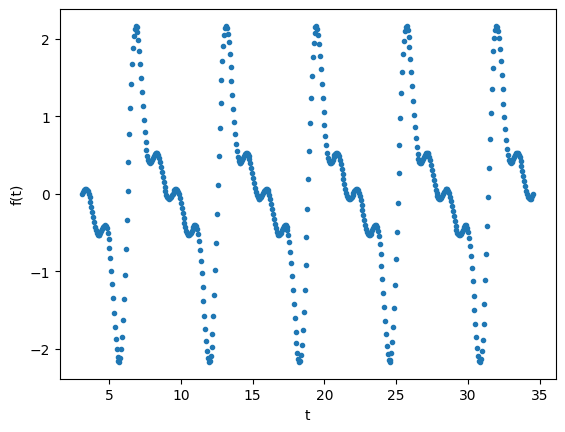

In [33]:
plt.plot(x,fx,'.')
plt.xlabel('t')
plt.ylabel('f(t)')


In [34]:
x2 = np.linspace(xlow,xhigh,npts)
fx_fourier = np.zeros(len(x2))

n = []
an = []
bn = []
pn = []
fn = []

for i in range(nterms+1):
    T = (xhigh-xlow)
    n.append(i)
    fn.append(i/(2.0*T))

    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0

    for k in range(len(x2)):
        a0sum = a0sum + 1/T*fx[k]*dt
        ansum = ansum + 1/T*fx[k]*np.cos(i*np.pi*x2[k]/T)*dt
        bnsum = bnsum + 1/T*fx[k]*np.sin(i*np.pi*x2[k]/T)*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
    else:
        an.append(ansum)
        bn.append(bnsum)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*np.pi*x2[j]/T)+bn[i]*np.sin(i*np.pi*x2[j]/T)        

Data: n = 1.0000, a_n = -0.0429, bn = -0.0139
Data: n = 2.0000, a_n = -0.0000, bn = 0.0000
Data: n = 3.0000, a_n = -0.0296, bn = -0.0407
Data: n = 4.0000, a_n = -0.0000, bn = 0.0000
Data: n = 5.0000, a_n = 0.0000, bn = -0.0642
Data: n = 6.0000, a_n = -0.0000, bn = -0.0000
Data: n = 7.0000, a_n = 0.0603, bn = -0.0829
Data: n = 8.0000, a_n = -0.0000, bn = -0.0000
Data: n = 9.0000, a_n = 0.2946, bn = -0.0957
Data: n = 10.0000, a_n = -0.0000, bn = 0.4990


Text(0, 0.5, 'f(t)')

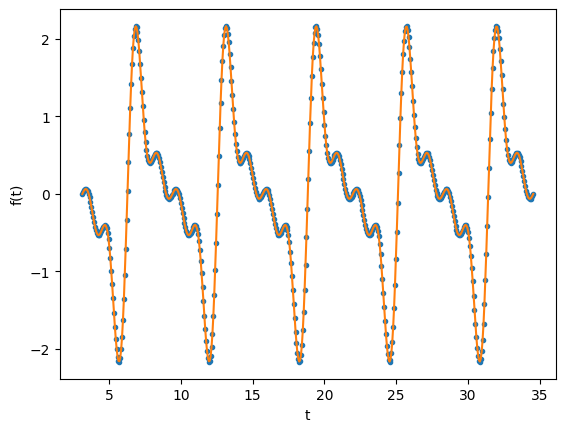

In [35]:
plt.plot(x,fx,'.')
plt.plot(x2,fx_fourier)
plt.xlabel('t')
plt.ylabel('f(t)')

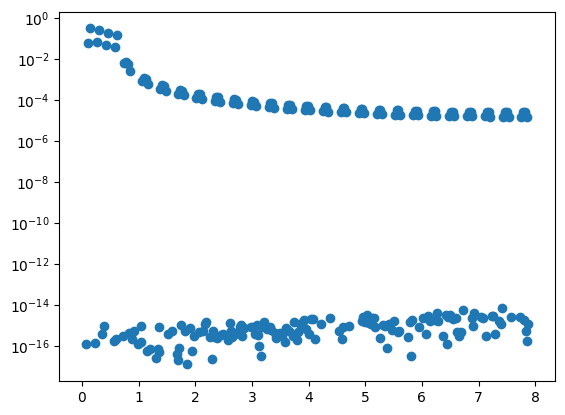

In [36]:
plt.plot(fn,an,'o')
plt.yscale("log")

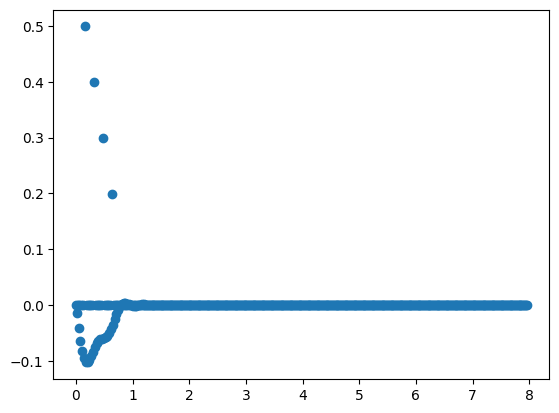

In [37]:
plt.plot(fn,bn,'o')

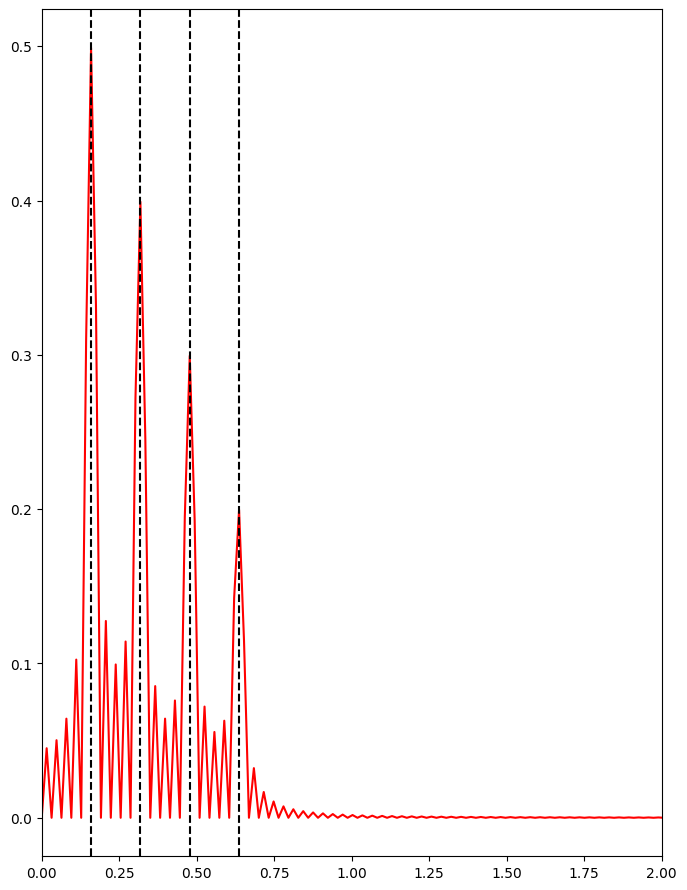

In [38]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11))
axs2.plot(fn,pn,'r-')
axs2.set_xlim(0.0,2)

# Plot vertical lines at the base frequency and its harmonics
plot_f_signal = True
if (plot_f_signal):
    axs2.axvline(x=1.0*f_signal, color='k', linestyle='--')
    axs2.axvline(x=2.0*f_signal, color='k', linestyle='--')
    axs2.axvline(x=3.0*f_signal, color='k', linestyle='--')
    axs2.axvline(x=4.0*f_signal, color='k', linestyle='--')

In [ ]:
import pandas as pd
import os
os.chdir("/Users/brash/phys340/JupyterNotebooks/Fourier_Series/")
df = pd.read_csv('US.csv')

In [ ]:
df.info()

In [ ]:
df['date'] = pd.to_datetime(df['submission_date'])    
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')

df.info()

In [ ]:
plt.plot(df['date_delta'],df['new_case'],'.')

In [ ]:
daymax = int(df['date_delta'].values.max())
print (daymax)

newsumbyday = [0 for i in range(0,daymax+1)]
day = [i for i in range(0,daymax+1)]

for i in range(len(df)):
    current_day = int(df['date_delta'].values[i])
    newsumbyday[current_day] += df['new_case'].values[i]
    
plt.plot(day,newsumbyday,'-')

In [ ]:
tmin = np.min(day)
tmax = np.max(day)
tbar = (tmax-tmin)/2.0

day=day-tbar

In [ ]:
plt.plot(day,newsumbyday,'-')
fx = newsumbyday

In [ ]:
npts = len(day)
xlow = np.min(day)
xhigh = np.max(day)

x = np.linspace(xlow,xhigh,npts)
dt = (xhigh-xlow)/(npts-1)

print (xlow,xhigh,dt)

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

# the Nyquist frequency corresponds to the highest meaningful frequency component
#
# The terms in the Fourier approximation look like cos(n*np.pi*t/P) or sin(n*np.pi*t/P)
#
# Thus, omega = n*np.pi/P = n*np.pi/(xhigh-xlow)
#       f = omega/(2.0*np.pi) = n/(2.0*(xhigh-xlow))
#
#       f_nyquist = n_max/(2.0*(xhigh-xlow))
#
#       n_max = 2.0*(xhigh-xlow)*f_nyquist

nterms = int(2.0*(xhigh-xlow)*f_nyquist)

print ('Max terms = ',nterms)

nterms = int(133)

In [ ]:
x2 = np.linspace(xlow,xhigh,npts)
fx_fourier = np.zeros(len(x2))

n = []
an = []
bn = []
pn = []
fn = []

for i in range(nterms+1):
    P = xhigh
    n.append(i)
    fn.append(i/(2.0*P))

    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0

    for k in range(len(x2)):
        a0sum = a0sum + 1/P*fx[k]*dt
        ansum = ansum + 1/P*fx[k]*np.cos(i*np.pi*x2[k]/P)*dt
        bnsum = bnsum + 1/P*fx[k]*np.sin(i*np.pi*x2[k]/P)*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
    else:
        an.append(ansum)
        bn.append(bnsum)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*np.pi*x2[j]/P)+bn[i]*np.sin(i*np.pi*x2[j]/P)     

In [ ]:
plt.plot(x,fx,'.')
plt.plot(x2,fx_fourier)

In [ ]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11))
axs2.plot(fn,pn,'r-')
axs2.set_yscale('log')

# turn on grid
axs2.grid(True)

once_per_week = 1.0/7.0

# Draw a vertical line at the once per week frequency
axs2.axvline(x=once_per_week, color='k', linestyle='--')